Business questions and concerns to answer with EDA: 

Are there any problems with the data? 
    Are there Null values? 
    Are there outliers? 
    Is the data sufficient? Sufficient for what kind of analysis?

Is the chemical composition of red and white wines comparable?

Does the chemical composition have any impact on the perceived quality of the wine? 
What are your observations? 


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
### Datasets ###

red_wine = pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-red.csv', sep=';')
white_wine =  pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-white.csv', sep= ';')



In [57]:
##### Feature Engineering #####

# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

red_wine['wine_type'] = 'red'


# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine['wine_type'] = 'white'

## Exploratory Data Analysis ## 

In [62]:
## Data to Explore ##

wines = pd.concat([red_wine, white_wine])

# re-shuffle records just to randomize data points
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

#wines.tail()

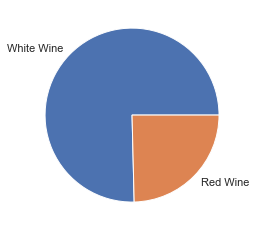

In [63]:
plt.pie(x=[white_wine.shape[0],red_wine.shape[0]], labels=['White Wine', 'Red Wine']);
plt.savefig('wines_count.png', facecolor='w')

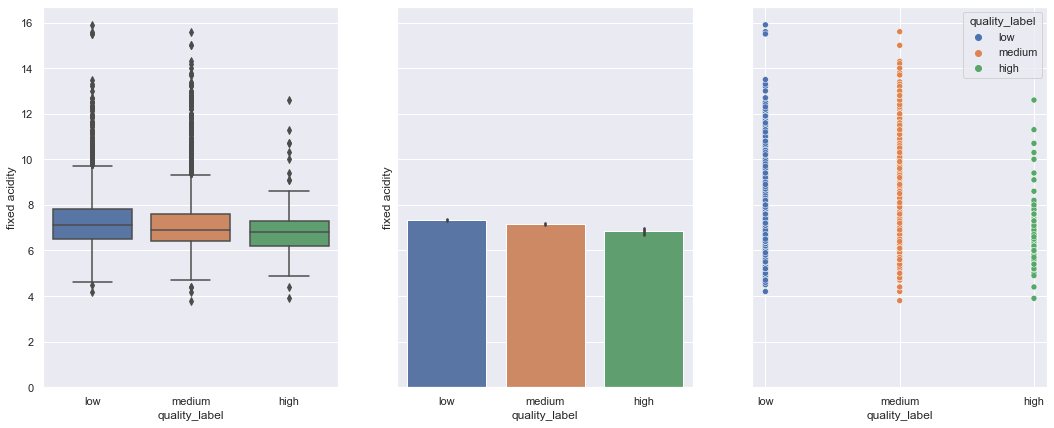

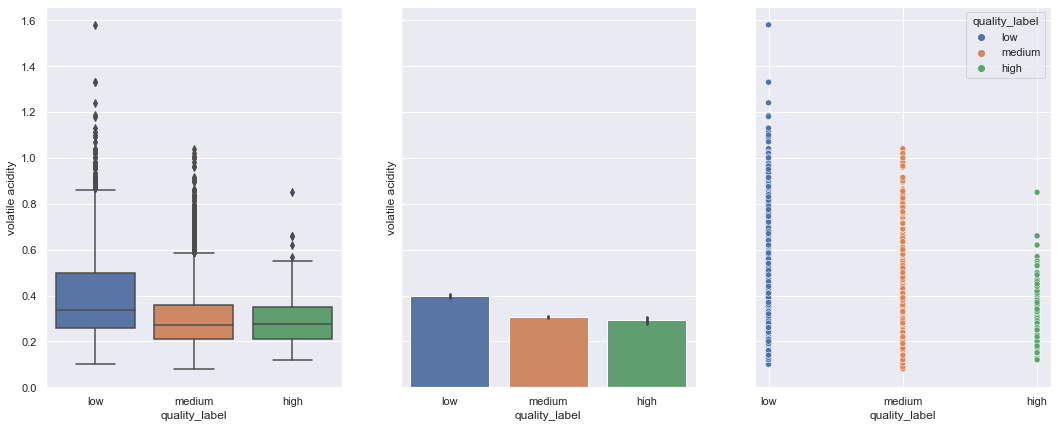

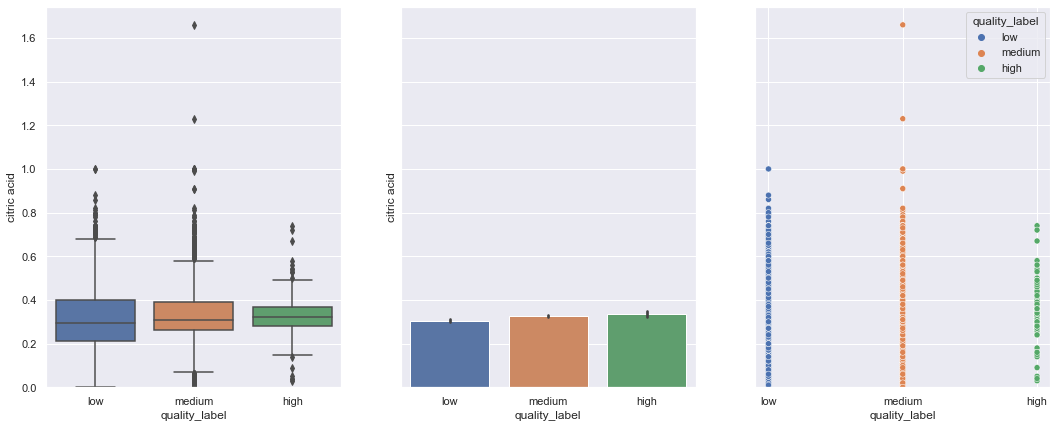

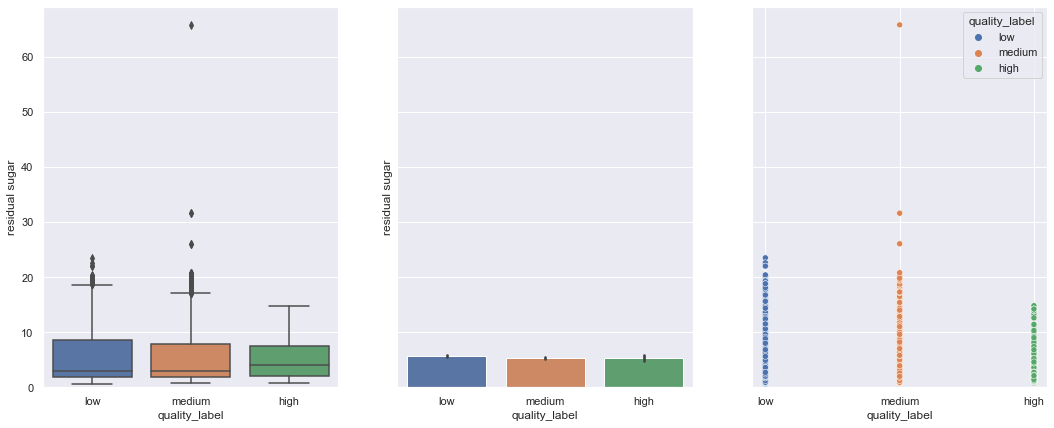

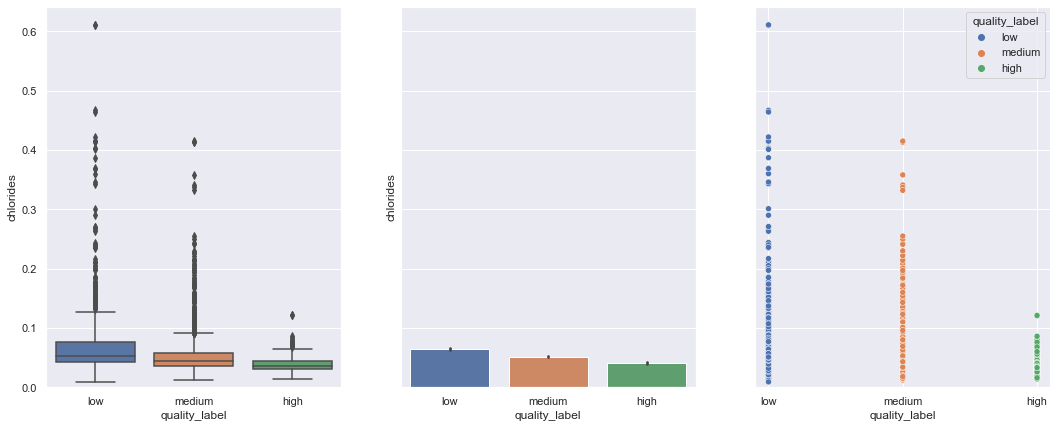

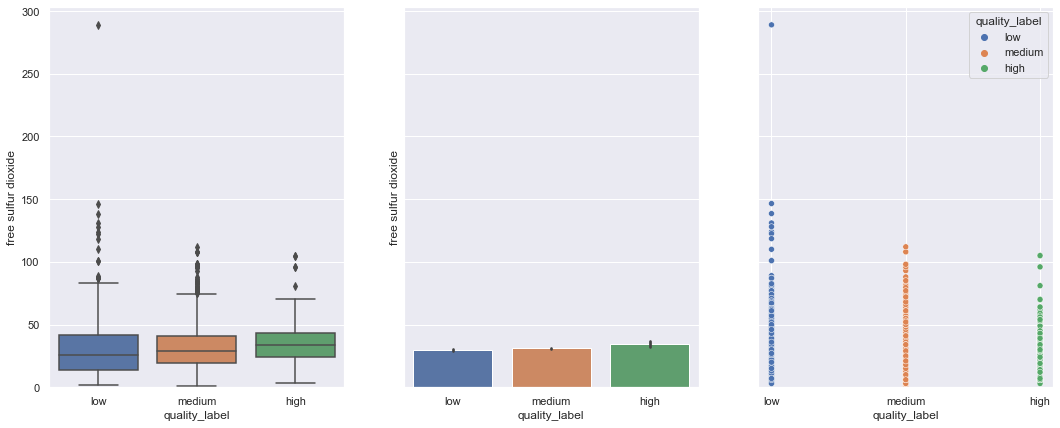

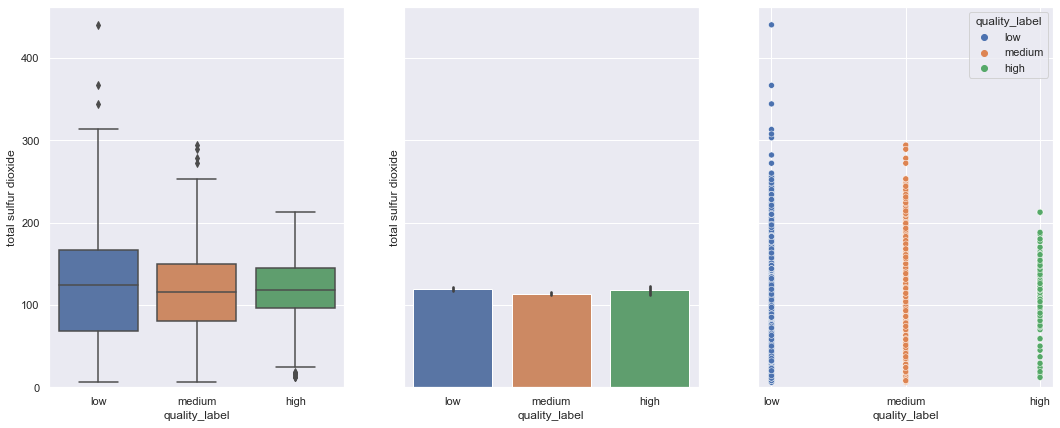

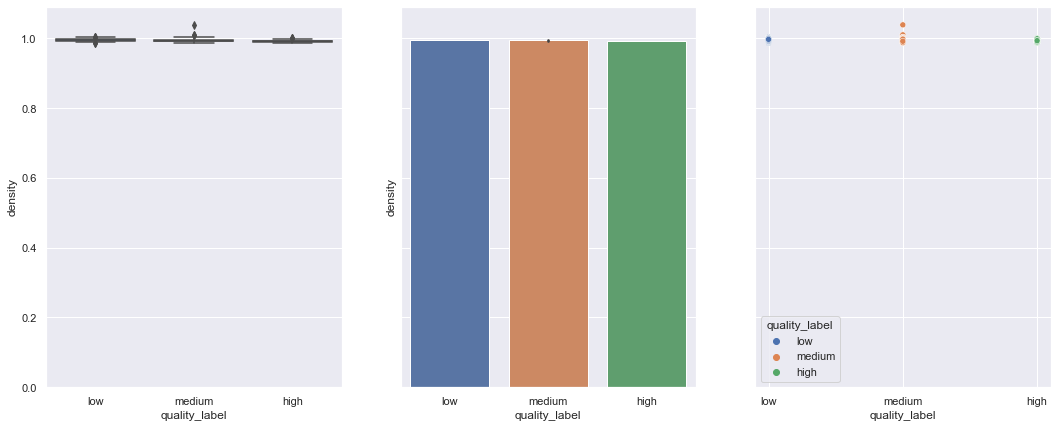

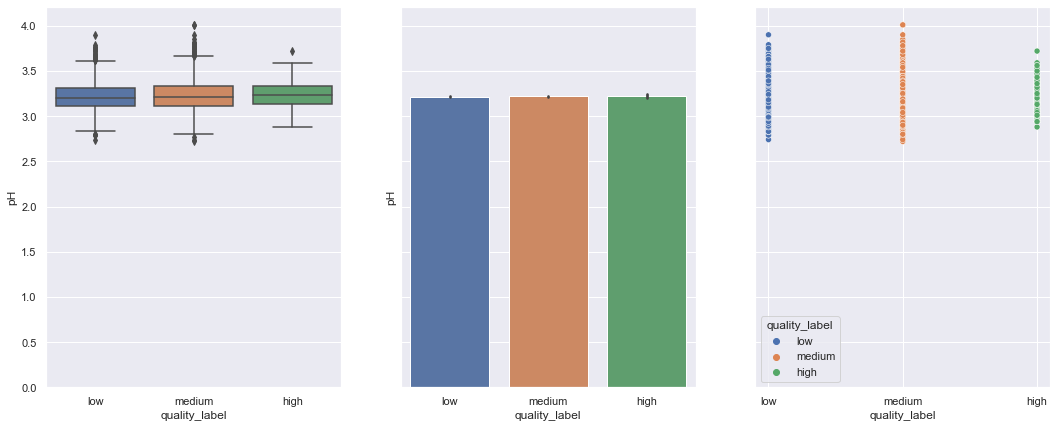

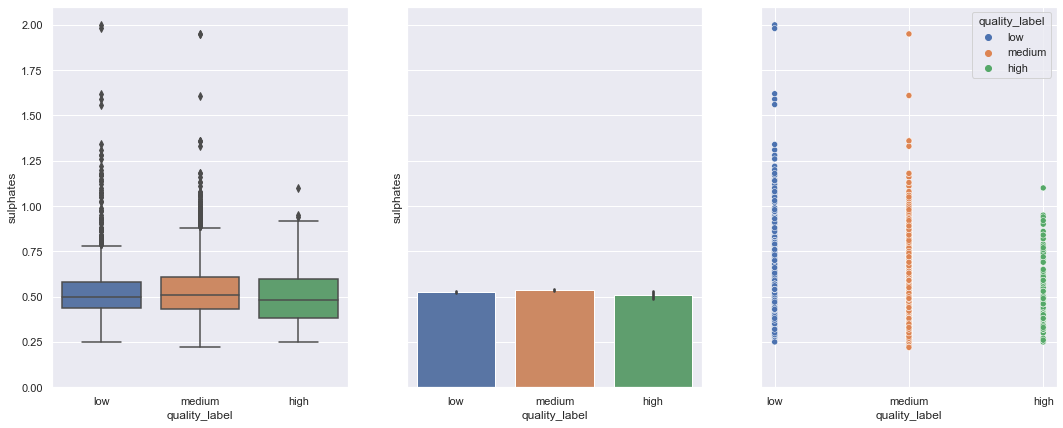

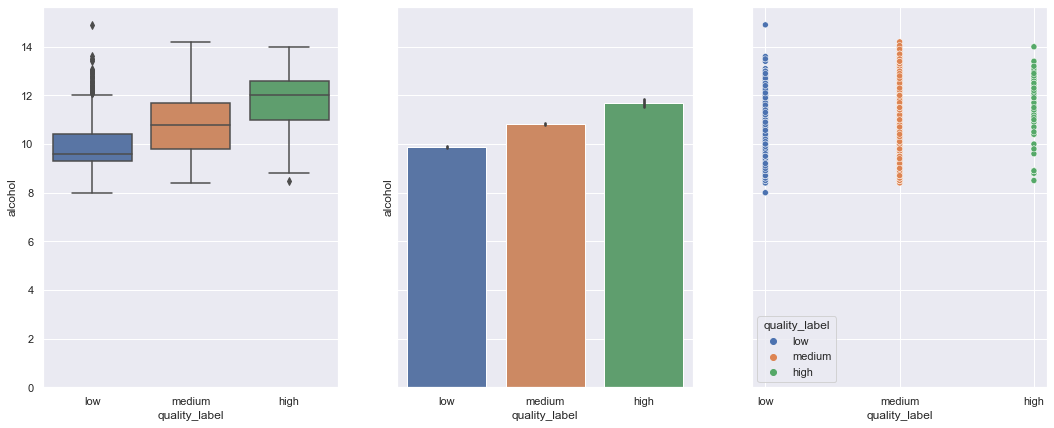

In [122]:

## exploring the relationship between features and label (quality_label) ##

# 1. visually check if there is any relationship between a feature and quaility
features = wines.select_dtypes(include=['float64']).columns

for feature in features: 

   # if feature == 'alcohol':

        f, axs = plt.subplots(1,3,
                      figsize=(18,7),
                      sharey=True)

        sns.boxplot(ax=axs[0],x=wines['quality_label'],y=wines[feature])

        sns.barplot(ax=axs[1],x=wines['quality_label'], y=wines[feature])

        sns.scatterplot(ax=axs[2],x=wines['quality_label'], y = wines[feature],hue=wines['quality_label'])
        
        plt.show()    


# 2. 

### Only alcohol appears to be differing significantly across different quality labels of wine, with high quality wine having the maximum alcohol content. The other features representing the physiochemical properties of wine, did not show any significant pattern across the different qualitiy labels of wine. However,....

### We have only analysed the relationship between one feature and the label. We still need to analyse the relationship between the label and the WHOLE feature set. For this we can use linear regression. 

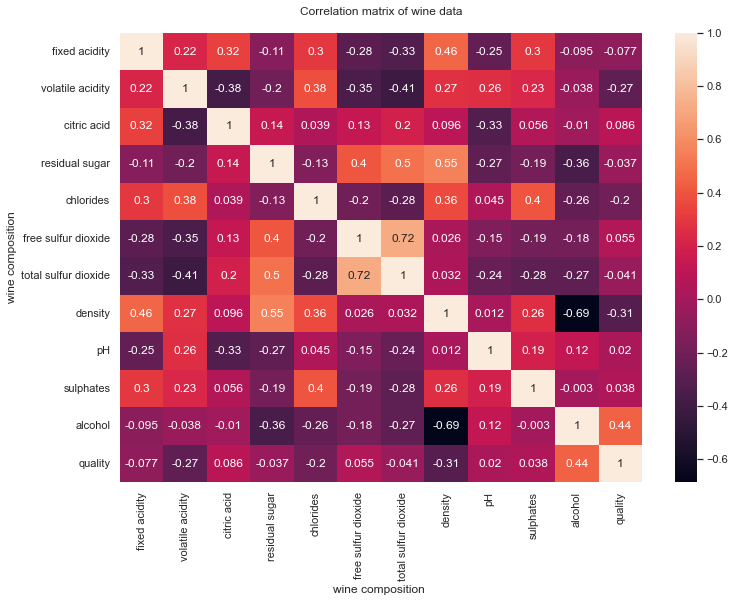

In [109]:
hm = sns.heatmap(wines.corr(), annot = True)
hm.set(xlabel='wine composition ', ylabel='wine composition', title = "Correlation matrix of wine data\n")
plt.show()


#### There is a lot of negative correlation. Let's try to explore this further with linear regression. 

In [124]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  quality_label         6497 non-null   category
 13  wine_type             6497 non-null   object  
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [132]:
from sklearn import linear_model, metrics

# defining feature matrix(X) and response vector(y)
X = wines.select_dtypes(include=['float64'])
y = wines['quality']

# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

# create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)


# regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))




Coefficients:  [ 6.26653198e-02 -1.33057559e+00 -9.38469650e-02  4.21231146e-02
 -7.72601821e-01  5.08015394e-03 -2.31389006e-03 -5.17242242e+01
  4.09880553e-01  8.03211864e-01  2.76566915e-01]
Variance score: 0.28361611753099114
